# Space Applications Part 2

Happy Independence Day in advance

## X Ray Data Analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from astropy.time import Time
from astropy.timeseries import TimeSeries
import warnings
warnings.filterwarnings("ignore")
from astropy.io import fits

Now that we have imported lets open a LC file or a **Light Curve** file

In [2]:
hdul = fits.open('Cen_X-3.lc')
hdul.info()

Filename: Cen_X-3.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  RATE          1 BinTableHDU     66   20000R x 3C   [D, E, E]   


Let's see the data stored

In [9]:
hdul[1].data['RATE']

array([ 56.142532, 258.78247 ,  56.15126 , ..., 258.41763 , -46.159744,
       156.88309 ], dtype=float32)

In [13]:
time = hdul[1].data['TIME']
rate = hdul[1].data['RATE']
print(len(time))
print(time[0],time[1],time[2],time[3])

20000
193385062.81629777 193385062.82629848 193385062.83629924 193385062.84629995


In [14]:
exposure = time[-1] - time[0]
print('Exposure (in sec)',exposure)
timeres = time[2] - time[1]
print('\nTime Resolution (in sec)',timeres)

Exposure (in sec) 200.00447911024094

Time Resolution (in sec) 0.010000765323638916


Text(0, 0.5, 'Count/s')

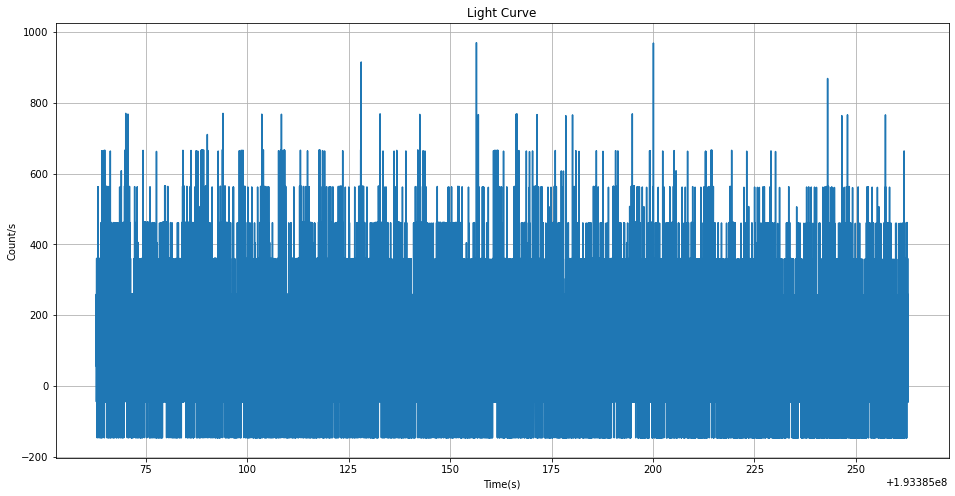

In [15]:
plt.figure(figsize=(16,8))
plt.plot(time,rate)
plt.title('Light Curve')
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Count/s')

### Binning of light curve
Bin size needs to be large enough for sufficient number of counts per bin but small enough so that real variation is not hidden

In [16]:
def lc_binning(time,rate,binsize=2):
    bins = np.arange(time[0],time[-1],binsize)
    digitized = np.digitize(time,bins)
    abs_time_bin = [time[digitized == i].mean() for i in range(1,len(bins))]
    un_time_bin = abs_time_bin - abs_time_bin[0]
    un_rate_bin = [rate[digitized == i].mean() for i in range(1,len(bins))]

    rate_bin = [x for x in un_rate_bin if str(x) != 'nan']
    time_bin = [x for x in un_time_bin if str(x) != 'nan']
    return time_bin,rate_bin

Text(0, 0.5, 'Count/s')

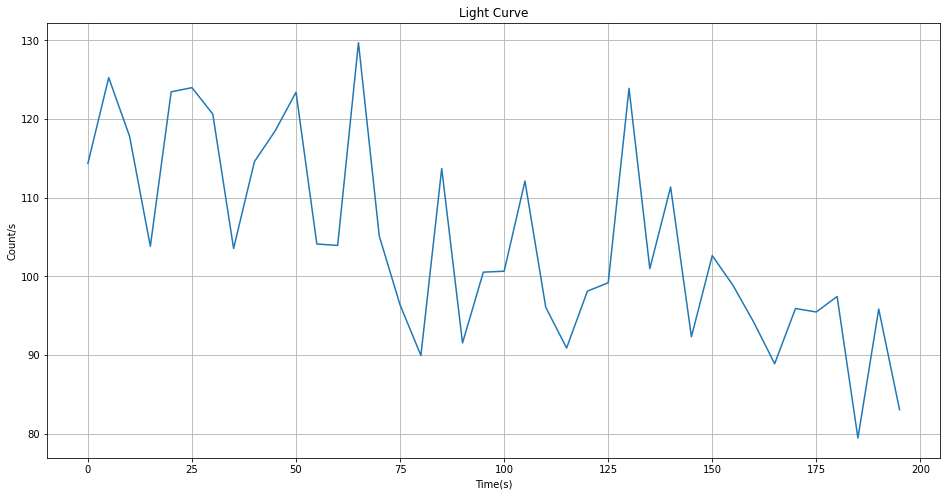

In [51]:
%matplotlib inline
time_bin,rate_bin=lc_binning(time,rate,5)
plt.figure(figsize=(16,8))
plt.plot(time_bin,rate_bin)
plt.title('Light Curve')
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Count/s')

Power vs frequency

In [26]:
fft = np.fft.fft(rate)
power = list(abs(fft))
frequency=[i/exposure for i in range(0,len(power))]

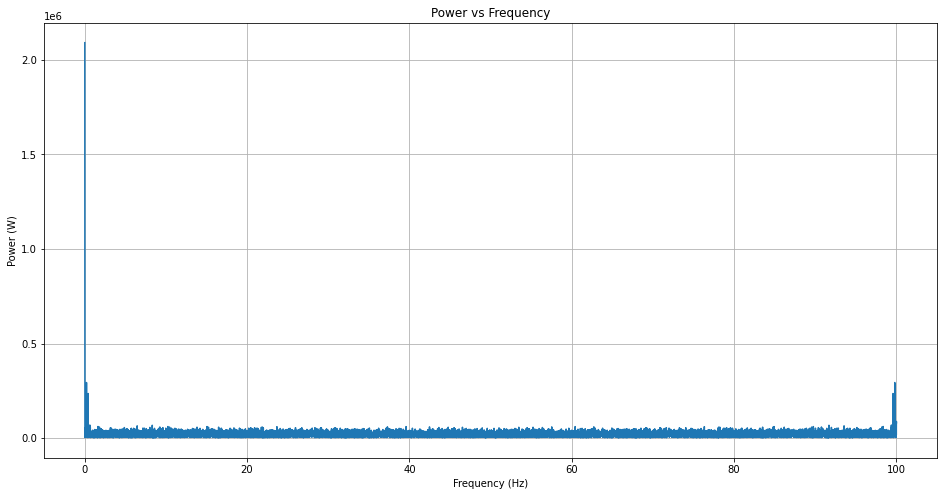

In [37]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(frequency,power)
# plt.ylim(0,300000)
# plt.xticks(np.linspace(0,frequency[-1]/2,20),fontsize=10)
plt.title('Power vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
# plt.xlim(0,0.01)
plt.grid()

<IPython.core.display.Javascript object>


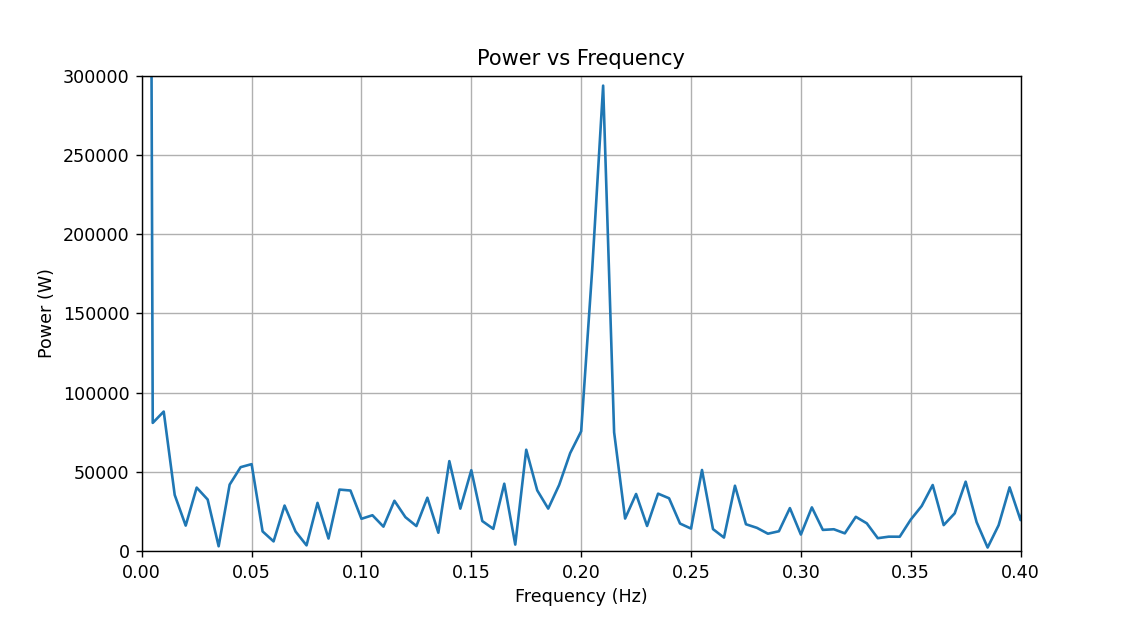

In [29]:
%matplotlib notebook
plt.figure(figsize=(9,5))
plt.plot(frequency,power)
plt.ylim(0,300000)
plt.title('Power vs Frequency')
plt.xlim(0,0.4)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
plt.grid()

We will try to find the highest power which is not the last one as the last one is noise so we shall consider the second last value

In [31]:
sorted(power)[-2]

293679.6693648881

In [183]:
#Trying to get the frequency associated with this power
power.index(293679.6693648881)

42

The frequency of this pulsar is:

In [185]:
frequency[42]

0.2099952970395724

The time period of this pulsar is:

In [186]:
1/0.2099952970395724

4.762011407386689

## Finding the Hidden Pulsars

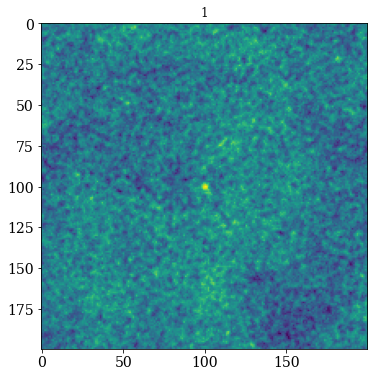

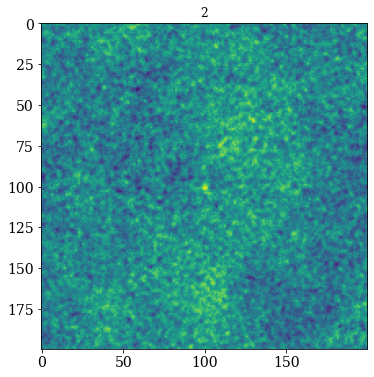

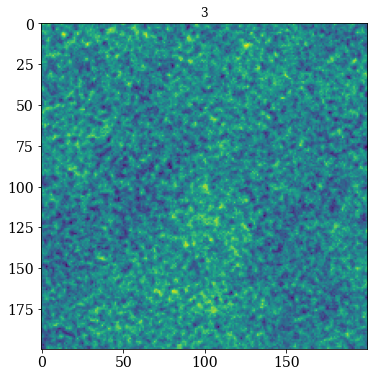

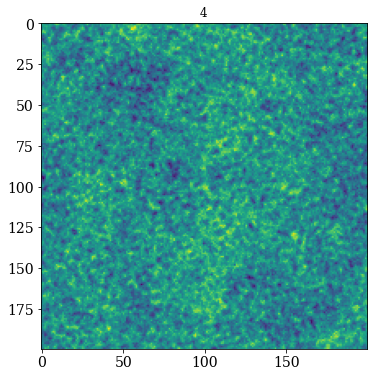

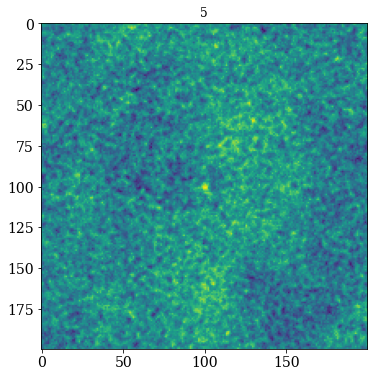

In [13]:
%matplotlib inline
import numpy as np
# from PIL import Image
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
data  = ['fits_images_all/image0.fits', 'fits_images_all/image1.fits', 'fits_images_all/image2.fits','fits_images_all/image3.fits','fits_images_all/image4.fits']
j=1
for i in data:
    plt.figure(figsize=(6,6))
    plt.title(j)
    j+=1
    plt.imshow(fits.getdata(i))

Stacking and taking mean

In [41]:
np.mean([[1,2,3,4,5,6],[2,3,4,5,6,7]],axis=0)

array([1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

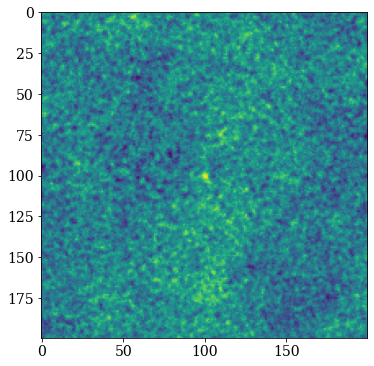

In [19]:
image_list=['fits_images_all/image0.fits', 'fits_images_all/image1.fits', 'fits_images_all/image2.fits','fits_images_all/image3.fits','fits_images_all/image4.fits']
image_concat=[]
for image in image_list:
    image_concat.append(fits.getdata(image))
# image_concat = [fits.getdata(image) for image in image_list]
stack_mean=np.mean(image_concat,axis=0)
plt.figure(figsize=(6,6))
plt.imshow(stack_mean)
# np.mean(image_concat,axis=0)

Histogram of one image data vs stacked one

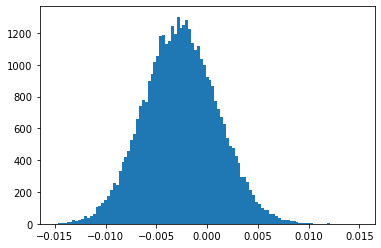

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
image_hist = plt.hist(fits.getdata(image_list[1]).flatten(), bins='auto',range=[-0.015,0.015])

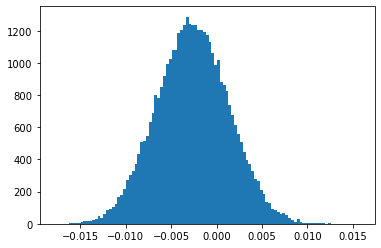

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
image_hist = plt.hist(stack_mean.flatten(), bins='auto')

## Can we do this better?

In [6]:
ar=np.array([1,2,3,4,5])
np.mean(ar)

3.0

In [7]:
np.median(ar)

3.0

In [8]:
ar=np.array([1,2,3,4,50])
np.mean(ar)

12.0

In [9]:
np.median(ar)

3.0

# Median

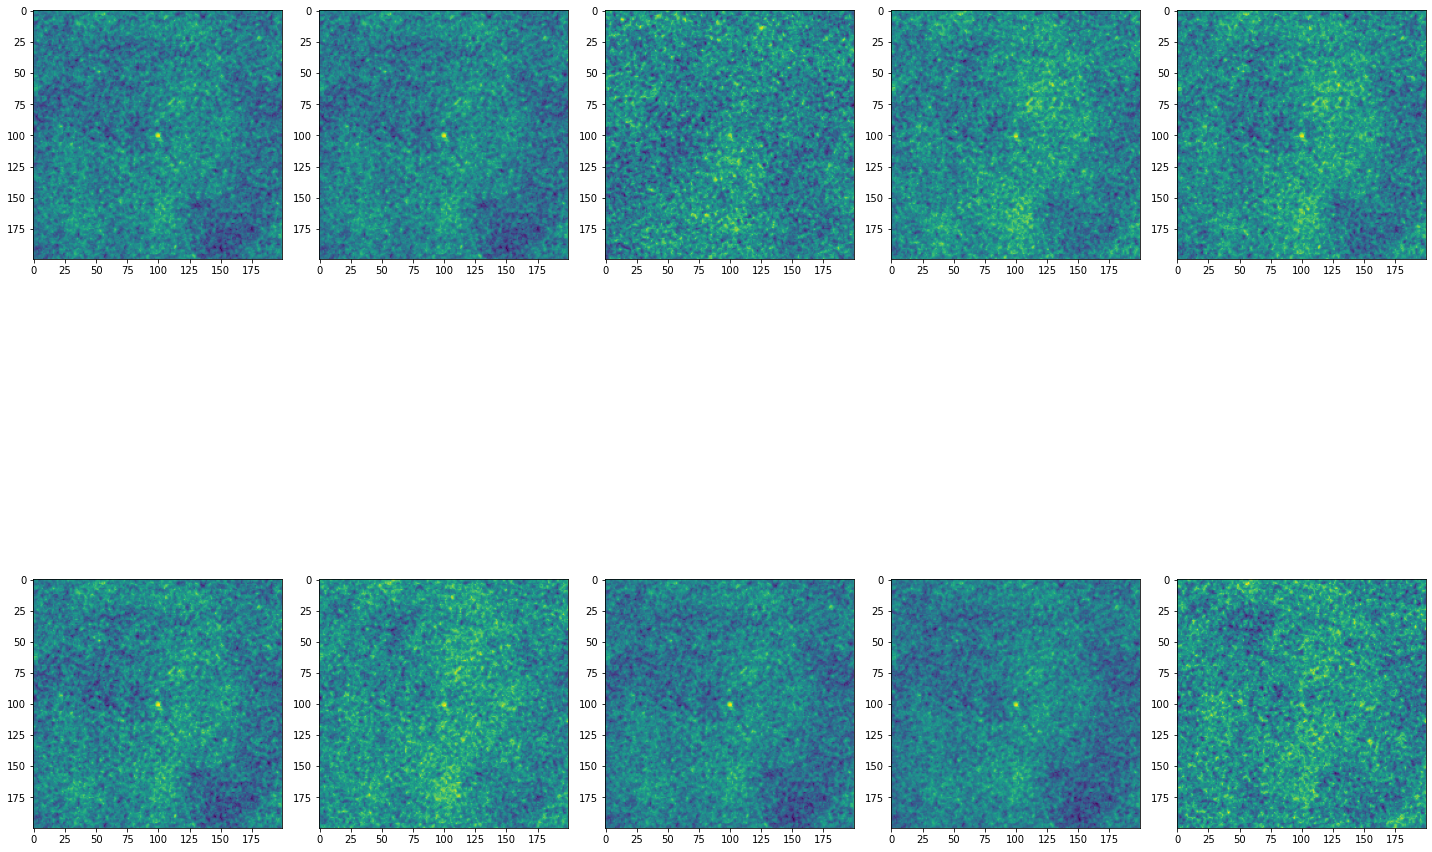

In [10]:
%matplotlib inline
image_med_data=[]
path="image{}.fits"
fig1,axis=plt.subplots(nrows=2,ncols=5,figsize=(20,20))
for i in range(10):
    p=fits.getdata(path.format(i))
    image_med_data.append(p)
    axis[i//5,i%5].imshow(p)
fig1.tight_layout(h_pad=0)

In [11]:
np.median(image_med_data,axis=0)

array([[-0.00171077, -0.00082809,  0.00241029, ..., -0.00448845,
        -0.00042421, -0.00058812],
       [ 0.0008764 , -0.00078915, -0.00097984, ..., -0.0026649 ,
        -0.0029578 ,  0.00056235],
       [-0.003719  , -0.00140372, -0.00050901, ..., -0.00142783,
        -0.00350235, -0.0003762 ],
       ...,
       [-0.00424529, -0.00516569, -0.00538156, ..., -0.00342571,
        -0.00408155,  0.00065221],
       [-0.00657394, -0.00401734, -0.0028283 , ..., -0.00483358,
        -0.00327303, -0.00248251],
       [-0.0045717 , -0.00473114, -0.00176411, ..., -0.00678473,
        -0.00686183, -0.00266288]])

Stacking and taking median, compare that to single image

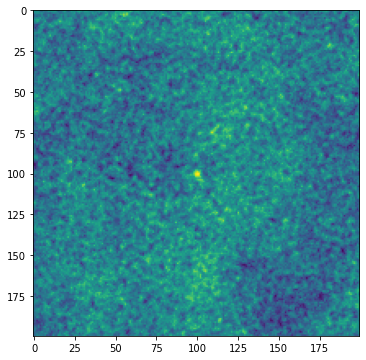

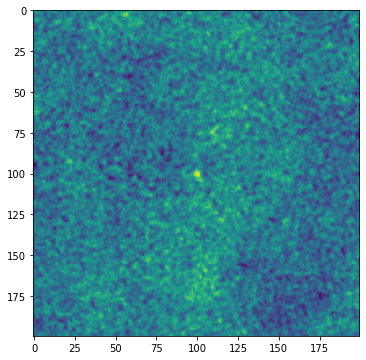

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(np.median(image_med_data,axis=0))
plt.figure(figsize=(6,6))
plt.imshow(np.mean(image_med_data,axis=0))

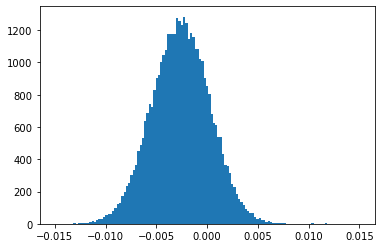

In [13]:
image_hist = plt.hist(np.median(image_med_data,axis=0).flatten(),  range=[-0.015,0.015],bins='auto')

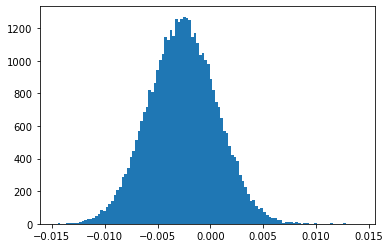

In [14]:
+image_hist = plt.hist(np.mean(image_med_data,axis=0).flatten(), bins='auto')

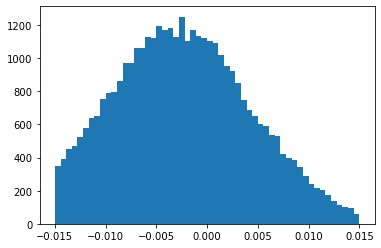

In [15]:
image_hist = plt.hist(fits.getdata('image10.fits').flatten(), bins='auto',range=[-0.015,0.015])

# Which method is better?

## 1000 FITS

In [53]:
image_concat=[]
for i in range(1000):
    a=fits.getdata('pulsar_example_fits_1000/{0:04}.fits'.format(i))
    image_concat.append(a)
stack_mean=np.mean(image_concat,axis=0)
stack_median=np.median(image_concat,axis=0)


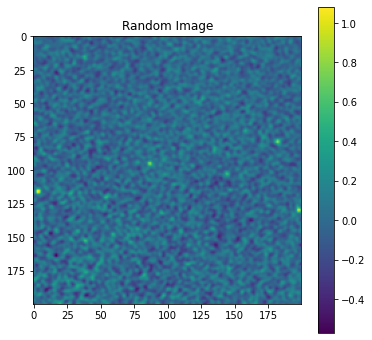

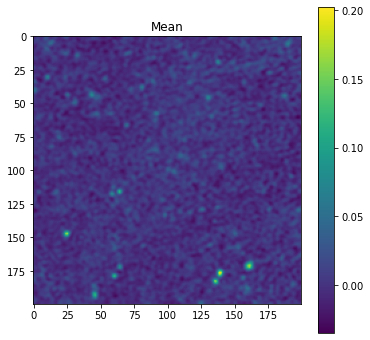

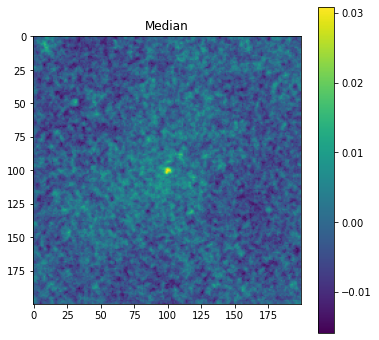

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(fits.getdata('pulsar_example_fits_1000/0318.fits'))
plt.colorbar()
plt.title('Random Image')
plt.figure(figsize=(6,6))
plt.imshow(stack_mean)
plt.colorbar()
plt.title('Mean')
plt.figure(figsize=(6,6))
plt.imshow(stack_median)
plt.title('Median')
plt.colorbar()

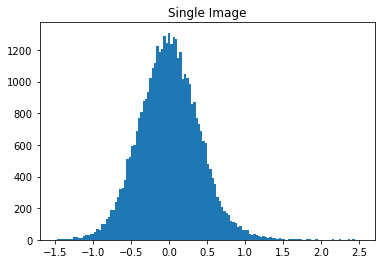

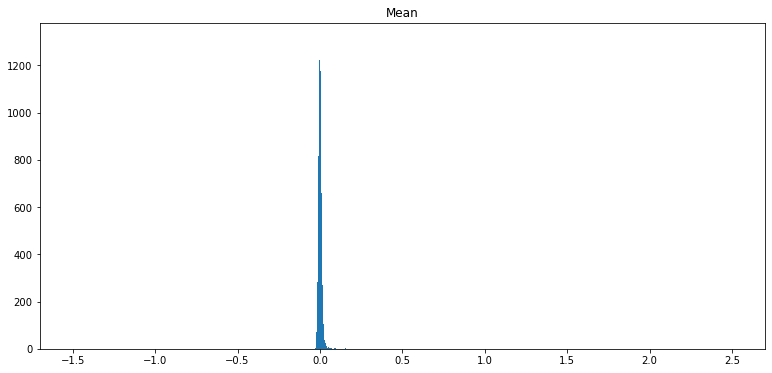

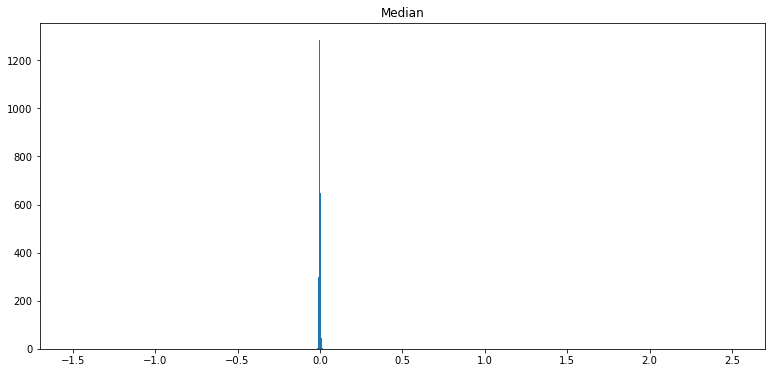

In [18]:
plt.hist(image_concat[345].flatten(),bins='auto',range=[-1.5,2.5])
plt.title('Single Image')
plt.figure(figsize=(13, 6))
plt.title('Mean')
plt.hist(stack_mean.flatten(),bins='auto',range=[-1.5,2.5]);
plt.figure(figsize=(13, 6))
plt.title('Median')
plt.hist(stack_median.flatten(),bins='auto',range=[-1.5,2.5]);

In [22]:
np.max(fits.getdata('pulsar_example_fits_1000/0678.fits'))

4.4198895

In [24]:
np.argmax(stack_median)

20299

In [26]:
stack_median.flatten()[20299]

0.030902095

In [22]:
np.max(stack_median)

0.030902095